# 8.3 PCA

PCA首先识别最靠近数据的超平面，然后将数据投影到该平面上。

## 8.3.1 保留差异性
将训练集投影到低维超平面之前需要选择正确的超平面。


## 8.3.2 主要成分

**主成分分析可以在训练集中识别出哪条轴对差异性的贡献度最高。**  轴的数量与数据集维度数量相同。

第i个轴称为数据的第i个主要成分（PC）

对于每个主要成分，PCA都找到一个指向PC方向的零中心单位向量。由于两个相对的单位向量位于同一轴上，因此PCA返回的单位向量的方向不稳定：如果稍微扰动训练集并再次运行PCA，则单位向量可能会指向原始向量的相反方向。但是，它们通常仍位于相同的轴上。在某些情况下，一对单位向量甚至可以旋转或交换（如果沿这两个轴的方差接近），但是它们定义的平面通常保持不变。

异值分解（SVD）的标准矩阵分解技术，可以将训练集矩阵X分解为三个矩阵$U\sum V^T$的矩阵乘法，其中V包含定义所有主要成分的单位向量。如公式8-1所示:

$$
V = \begin{bmatrix}
 | & | & \cdots & | \\
 c_1 & c_2 & \cdots & c_n \\
 | & | & \cdots & |
 \end{bmatrix}  \tag{8-1}
$$



In [1]:
%matplotlib inline
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

In [2]:
np.random.seed(42)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

X


array([[ 0.7039474 ,  0.65945649,  0.3645693 ],
       [-1.0763742 , -0.50036633, -0.21646923],
       [-0.90914129,  0.22798983,  0.05968884],
       [-0.26327638,  0.52076062,  0.31957985],
       [ 1.10617261,  0.17601773,  0.13888377],
       [ 1.0008109 ,  0.15934054,  0.07250963],
       [ 0.87852969, -0.25299137, -0.07699588],
       [-1.13697989, -0.29958862, -0.2851556 ],
       [-0.36237145,  0.50948368,  0.10889779],
       [-0.7732104 ,  0.3332867 ,  0.05678017],
       [ 0.77535051, -0.28414251,  0.01996138],
       [-0.95258223, -0.54563776, -0.17623123],
       [-1.14143853, -0.19599228, -0.17164135],
       [ 1.10180912,  0.27754754,  0.33879858],
       [ 1.12822483,  0.30165509,  0.17685333],
       [ 1.16129536,  0.28698597,  0.47424224],
       [ 0.97281446,  0.60223335,  0.34051818],
       [ 0.05953046,  0.59871039,  0.09985041],
       [ 0.47966775,  0.76970355,  0.17178859],
       [ 0.9661238 ,  0.46601271,  0.28466344],
       [-0.34153172,  0.51072655,  0.096

In [3]:
# 使用Numpy的svd()函数来获取训练集的所有主成分
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [4]:
m, n = X.shape
m, n

(60, 3)

In [5]:
S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [6]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [7]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [8]:
X2D_using_svd = X2D

PCA假定数据集以原点为中心。正如我们将看到的，Scikit-Learn的PCA类负责为你居中数据。如果你自己实现PCA（如上例所示），或者使用其他库，请不要忘记首先将数据居中。

## 8.3.3 向下投影到d维度

一旦确定了所有主要成分，你就可以将数据集投影到前d个主要成分定义的超平面上，从而将数据集的维度降低到d维。选择这个超平面可确保投影将保留尽可能多的差异性。

要将训练集投影到超平面上并得到维度为d的简化数据集$X_{d-proj}$，计算训练集矩阵X与矩阵$W_d$的矩阵相乘，矩阵$W_d$定义为包含V的前$d$列的矩阵。如公式8-2所示:

$$
    X_{d-proj} = X W_d \tag{8-2}
$$


## 8.3.4 Scikit-Learn PCA

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X2D[:5]

array([[-0.690074  , -0.36150744],
       [ 1.39636097,  0.34497714],
       [ 1.00728461, -0.35025708],
       [ 0.2736333 , -0.50516373],
       [-0.91324535,  0.26290852]])

In [10]:
X2D_using_svd[:5]

array([[-0.690074  , -0.36150744],
       [ 1.39636097,  0.34497714],
       [ 1.00728461, -0.35025708],
       [ 0.2736333 , -0.50516373],
       [-0.91324535,  0.26290852]])

注意在数据集上执行PCA多次可能结果会有轻微的不同，这是由于一些投影轴的方向有可能翻转了。

## 8.3.5 可解释方差比

另一个有用的信息是每个主成分的可解释方差比，可以通过explained_variance_ratio_变量来获得。该比率表示沿每个成分的数据集方差的比率。


In [11]:
pca.explained_variance_ratio_

array([0.85406025, 0.13622918])

此输出告诉你，数据集方差的84.2%位于第一个PC上，而14.6%位于第二个PC上。对于第三个PC，这还不到1.2%，因此可以合理地假设第三个PC携带的信息很少。

## 8.3.6 选择正确的维度

与其任意选择要减小到的维度，不如选择相加足够大的方差部分（例如95%）的维度。当然，如果你是为了数据可视化而降低维度，这种情况下，需要将维度降低到2或3。

以下代码在不降低维度的情况下执行PCA，然后计算保留95%训练集方差所需的最小维度：


In [12]:
# 以下代码在不降低维度的情况下执行PCA，然后计算保留95%训练集所需的最小维度
X_train = np.copy(X)
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum


array([0.85406025, 0.99028943, 1.        ])

In [13]:
d = np.argmax(cumsum >= 0.95) + 1
d

2

然后，你可以设置`n_components=d`并再次运行PCA。但是还有一个更好的选择：将`n_components`设置为0.0到1.0之间的浮点数来表示要保留的方差率，而不是指定要保留的主成分数：

In [14]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
X_reduced

array([[-0.690074  , -0.36150744],
       [ 1.39636097,  0.34497714],
       [ 1.00728461, -0.35025708],
       [ 0.2736333 , -0.50516373],
       [-0.91324535,  0.26290852],
       [-0.79710027,  0.26718188],
       [-0.55173939,  0.65062721],
       [ 1.41612959,  0.16567641],
       [ 0.40776059, -0.46053322],
       [ 0.85209856, -0.40516935],
       [-0.46269946,  0.61952736],
       [ 1.2826692 ,  0.41018903],
       [ 1.37468032,  0.03618608],
       [-0.96941594,  0.10932241],
       [-0.97219266,  0.14390464],
       [-1.05216924,  0.07740862],
       [-0.92770444, -0.22364286],
       [-0.01473543, -0.4153169 ],
       [-0.47010859, -0.46920058],
       [-0.87761843, -0.08515546],
       [ 0.38973612, -0.45189716],
       [-0.96989867,  0.19819051],
       [-0.93689997, -0.09307933],
       [-0.81304146, -0.26096051],
       [-0.41368569, -0.42009096],
       [ 1.2830484 , -0.02603822],
       [-0.95210787,  0.23163682],
       [-0.2005476 , -0.49130242],
       [ 0.33988682,

另一个选择是将可解释方差绘制成维度的函数（简单地用cumsum绘制）。曲线上通常会出现一个拐点，其中可解释方差会停止快速增大。在这种情况下，你可以看到将维度降低到大约100而不会损失太多的可解释方差。

![fig 8-8](./files/fig_8-8.png)

## 8.3.7 PCA压缩
降维后，训练集占用的空间要少得多。例如，将PCA应用于MNIST数据集，同时保留其95%的方差。你会发现每个实例将具有150多个特征，而不是原始的784个特征。因此，尽管保留了大多数方差，但数据集现在不到其原始大小的20%！这是一个合理的压缩率，你可以看到这种维度减小极大地加速了分类算法（例如SVM分类器）。通过应用PCA投影的逆变换，还可以将缩减后的数据集解压缩回784维。由于投影会丢失一些信息（在5%的方差被丢弃），因此这不会给你原始的数据，但可能会接近原始数据。

**原始数据与重构数据（压缩后再解压缩）之间的均方距离称为重构误差**。


In [15]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [16]:
X.shape

(70000, 784)

In [17]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

X_reduced.shape, X_recovered.shape

((70000, 154), (70000, 784))

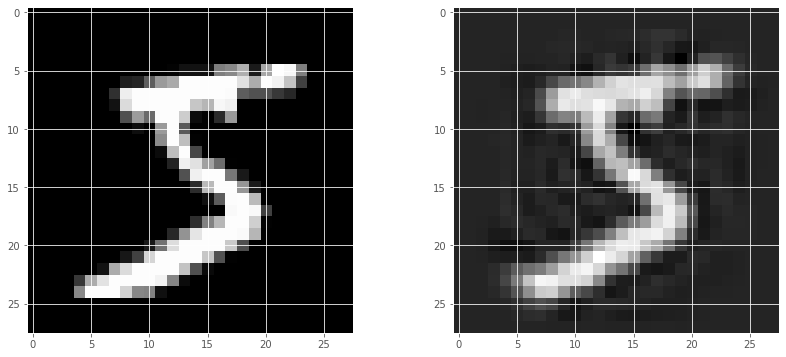

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))
plt.sca(axes[0])
image = X[:1,]
# image = np.reshape(image, (-1, 1))
image=np.reshape(image, (28, -1))
plt.imshow(image, cmap="gray")

plt.sca(axes[1])
image = X_recovered[:1,]
# image = np.reshape(image, (-1, 1))
image=np.reshape(image, (28, -1))
plt.imshow(image, cmap="gray")


PCA逆变换，回到原始数量的维度
$$
X_{recovered} = X_{d-proj}W_d^T \tag{8-3}
$$


## 8.3.8 随机PCA
如果将超参数svd_solver设置为"randomized"，则Scikit-Learn将使用一种称为Randomized PCA的随机算法，该算法可以快速找到前d个主成分的近似值。它的计算复杂度为$O（m\times d^2）+O（d^3）$，而不是完全SVD方法的$O（m \times n^2）+O（n^3）$，因此，当d远远小于n时，它比完全的SVD快得多：

```python
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X)
```

默认情况下，svd_solver实际上设置为"auto"：如果m或n大于500并且d小于m或n的80%，则Scikit-Learn自动使用随机PCA算法，否则它将使用完全的SVD方法。如果要强制Scikit-Learn使用完全的SVD，可以将svd_solver超参数设置为"full"。

## 8.3.9 增量PCA

前面的PCA实现的一个问题是，它们要求整个训练集都放入内存才能运行算法。幸运的是已经开发了**增量PCA（IPCA）算法**，它们可以使你把训练集划分为多个小批量，并一次将一个小批量送入IPCA算法。这对于大型训练集和在线（即在新实例到来时动态运行）应用PCA很有用。

以下代码将MNIST数据集拆分为100个小批量（使用NumPy的`array_split（）`函数），并将其馈送到Scikit-Learn的`IncrementalPCA`类，来把MNIST数据集的维度降低到154（就像之前做的那样）。请注意，你必须在每个小批量中调用`partial_fit（）`方法，而不是在整个训练集中调用`fit（）`方法：


In [23]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100

inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X)

另外，你可以使用NumPy的`memmap`类，该类使你可以将存储在磁盘上的二进制文件中的大型数组当作完全是在内存中一样来操作，该类仅在需要时才将数据加载到内存中。由于`IncrementalPCA`类在任何给定时间仅使用数组的一小部分，因此内存使用情况处于受控状态。如以下代码所示，这使得调用通常的`fit（）`方法成为可能：


```python
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches

inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)
```